### Desafío Variables
Nombre: Thomas Peet, Braulio Águila, Camilo Ramírez  
Generación: G47  
Profesores: Alfonso Tobar - Juan Pablo Ramírez  
Fecha: 30-06-2022  

---

### Descripción

La empresa en la cual usted trabaja tiene como solicitud el análisis del Índice de Desarrollo Humano (IDH) de diversos países para elaborar un informe para el Ministerio de Relaciones Exteriores a fin de poder contar con la data necesaria para poder comenzar a trabajar en relaciones diplomáticas más estrechas con diversos países. Para ello, usted queda a cargo de poder revisar la base de datos Quality of Government, de la Universidad de Gotemburgo.

Las unidades de medición en esta base corresponden a 194 países, recolectando los últimos datos de enero del 2018. Además, se le recuerda que la base de datos es un compendio de alrededor de 1900 variables que miden las causas y consecuencias de un buen gobierno en materias económicas, salud pública, medio ambiente, salud institucional, corrupción, entre otras.

---


**1) Genere una muestra de casos (1 punto).** Para ello debes considerar:
* Utilice los últimos 4 dígitos de su rut como semilla pseudoaleatoria.
* Seleccione el 50% de los casos.  
* Cada base generada debe contener los siguientes elementos:  
    - El índice de desarrollo humano (undp_hdi).  
    - El nombre del país (ccodealp).  
    - La región a la que pertenece (ht_region).  
    - El PIB per cápita. (gle_cgdpc).  
    - El total de la población (imf_pop).  
* Si su apellido está entre la A y la M, escoja las siguientes variables del módulo
Educación:   
    - ffp_hf: Human Flight and Brain Drain.  
    - wef_qes: Quality of the educational system.  
    - wdi_expedu: Government expenditure on education, total (% of GDP).  
    - wdi_ners: School enrollment, secondary (% net).  
* Si su apellido está entre la N y la Z, escoja las siguientes variables del módulo
Salud:  
    - wef_imort: Infant mortality, deaths/1000 live births.  
    - who_alc2000: Alcohol consumption per capita (2000-).  
    - who_tobt: Current smoking of any tobacco product (Total).  
    - wdi_exph: Government expenditure on health, total (% of GDP).  
    - Guarde esta tabla procesada en un nuevo objeto.  
    - Renombre las categorías de la variable ht_region de números a regiones.  


In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('qog_std_cs_jan18.csv')

In [36]:
df.head()

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relacc,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.710616,1.704692,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 1882 entries, ccode to wvs_trust
dtypes: float64(1855), int64(22), object(5)
memory usage: 2.8+ MB


In [38]:
"""
Descripción de las variables a utilizar:

Comunes:
undp_hdi: El índice de desarrollo humano.
ccodealp: El nombre del país.
ht_region: La región a la que pertenece.
gle_cgdpc: El PIB per cápita.
imf_pop: El total de la población.

para Apellidos A-M:
ffp_hf: Human Flight and Brain Drain.
○wef_qes: Quality of the educational system.
○wdi_expedu: Government expenditure on education, total(% of GDP).
○wdi_ners: School enrollment, secondary (% net).

para Apellidos N-Z:
wef_imort: Infant mortality, deaths/1000 live births.
who_alc2000: Alcohol consumption per capita (2000-).
who_tobt: Current smoking of any tobacco product (Total).
wdi_exph: Government expenditure on health, total(% of GDP)

"""

comun = ["undp_hdi", "ccodealp", "ht_region", "gle_cgdpc", "imf_pop"] 
apellidos_a_m = ["ffp_hf"   , "wef_qes"     , "wdi_expedu"  , "wdi_ners"]
apellidos_n_z = ["wef_imort", "who_alc2000" , "who_tobt"    , "wdi_exph"]

lista_columnas = comun + apellidos_n_z  # Cambiar lista de apellidos según corresponda
df_work = df[lista_columnas]


#### Re-etiquetado de ht_region

In [39]:
lista_modificar      = [1,2,3,4,5,6,7,8,9,10]
lista_nuevos_nombres = ['EastEurope', 
                        'LatAm', 
                        'NorthAfrica',
                        'SubSaharian',
                        'WesternDem',
                        'EastAsia',
                        'SouthEastAsia',
                        'SouthAsia',
                        'Pacific',
                        'Caribbean']
df_work.loc[:,'ht_region'] = df_work.loc[:,'ht_region'].replace(lista_modificar,lista_nuevos_nombres)

C:\Users\tomas\AppData\Local\Temp\ipykernel_24712\3697122698.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work.loc[:,'ht_region'] = df_work.loc[:,'ht_region'].replace(lista_modificar,lista_nuevos_nombres)


### Selección del 50% de los datos

In [40]:
last_4_digits_rut = 5801                # Cambiar según usuario
df_work_sample = df_work.sample(frac = 0.5,random_state = last_4_digits_rut)

---

**2) Genere una función que ingrese su objeto y devuelva lo siguiente (2 puntos):**
- Por cada variable existente en su objeto, calcule las medidas descriptivas para
los casos continuos.
- Para cada variable discreta, que calcule la frecuencia.
- Reporte las estadísticas descriptivas para gle_cgdpc, undp_hdi, imf_pop.
- Compare las estadísticas con algún compañero. ¿Ve alguna diferencia
sustancial en alguna de ellas?

<mark>### TODO</mark>  
Nos faltaría comentar lo siguiente "Compare las estadísticas con algún compañero. ¿Ve alguna diferencia sustancial en alguna de ellas?"


In [41]:
def description(df, lista_columnas_descripcion):
    # Para seleccionar variables numéricas, usamos .select_dtypes(np.number)
    print("_________________________________________________")
    print("_________________________________________________")
    print('Se recomienda ver output completo.')
    print("_________________________________________________")
    print("_________________________________________________")
    print(f'Medias para variables numéricas')
    print(df.select_dtypes(np.number).mean())
    print("_________________________________________________")
    # Para seleccionar variables categóricas, usamos .select_dtypes(object)
    print(f'Frecuencias para variables categóricas')
    print("*************************")
    df.select_dtypes(object).apply(lambda x: print(x.value_counts(),'\n*************************'))
    print("_________________________________________________")    
    print(f"Descripción variables {','.join(lista_columnas_descripcion)}")
    print(df[lista_columnas_descripcion].describe())

description(df_work_sample, ["gle_cgdpc", "undp_hdi", "imf_pop"])

_________________________________________________
_________________________________________________
Se recomienda ver output completo.
_________________________________________________
_________________________________________________
Medias para variables numéricas
undp_hdi           0.690154
gle_cgdpc      14191.922462
imf_pop           23.603945
wef_imort         25.182034
who_alc2000        4.960889
who_tobt          23.056061
wdi_exph           6.710499
dtype: float64
_________________________________________________
Frecuencias para variables categóricas
*************************
DMA    1
FIN    1
STP    1
MCO    1
COL    1
      ..
IRQ    1
CHE    1
IDN    1
VUT    1
KOR    1
Name: ccodealp, Length: 97, dtype: int64 
*************************
SubSaharian      27
WesternDem       14
NorthAfrica      12
EastEurope       12
LatAm             8
Caribbean         7
Pacific           7
SouthEastAsia     5
SouthAsia         3
EastAsia          2
Name: ht_region, dtype: int64 
*********

#### **Comentarios**
(Comentamos las tendencias de las columnas solicitadas)

---

**3. Genere una función que liste las observaciones perdidas de una variable (2 puntos)**
- La función debe contener los siguientes argumentos:  
    * `dataframe`: La función debe ingresar un objeto DataFrame.
    * `var`: Variable a inspeccionar.
    * `print_list`: Opción para imprimir la lista de observaciones perdidas en la
variable. Debe ser False por defecto.
- La función debe retornar la cantidad de casos perdidos y el porcentaje
correspondiente.
- Cuando `print_list = True` , debe retornar la lista decasos.
- Analice todas las variables y sus casos perdidos.
Para las 3 variables con un mayor porcentaje de casos perdidos, solicite la
lista de países con ausencia de datos.

In [42]:
variables_con_mas_datos_nulos = pd.Series(df_work_sample.count().sort_values(ascending=True)[:3].index)
# El método count sirve para contar solo los valores no nulos, si no se especifíca lo contrario. De aquí podemos ver que las 3 variables con más datos no nulos son:
print(variables_con_mas_datos_nulos)

0     who_tobt
1      imf_pop
2    wef_imort
dtype: object


In [43]:
def null_analyzer(dataframe, var, print_list=False):
    null_values = dataframe[var].isnull().sum()
    porcentaje_nulos = round(100 * null_values / len(dataframe),2)
    print(f"La columna {var} tiene {null_values} datos nulos de un total de {len(dataframe)}, correspondientes al {porcentaje_nulos}%")
    if print_list:
        print(f"Los datos nulos en la columna {var} son los siguientes")
        nulos = dataframe[var].isnull()
        display(dataframe[nulos])
    return null_values, porcentaje_nulos


In [44]:
# null_analyzer para las todas las variables con print_list = False
_ = pd.Series(df_work_sample.columns).apply(lambda x: null_analyzer(df_work_sample, x, print_list=False))

La columna undp_hdi tiene 6 datos nulos de un total de 97, correspondientes al 6.19%
La columna ccodealp tiene 0 datos nulos de un total de 97, correspondientes al 0.0%
La columna ht_region tiene 0 datos nulos de un total de 97, correspondientes al 0.0%
La columna gle_cgdpc tiene 1 datos nulos de un total de 97, correspondientes al 1.03%
La columna imf_pop tiene 24 datos nulos de un total de 97, correspondientes al 24.74%
La columna wef_imort tiene 21 datos nulos de un total de 97, correspondientes al 21.65%
La columna who_alc2000 tiene 7 datos nulos de un total de 97, correspondientes al 7.22%
La columna who_tobt tiene 31 datos nulos de un total de 97, correspondientes al 31.96%
La columna wdi_exph tiene 1 datos nulos de un total de 97, correspondientes al 1.03%


In [45]:
# null_analyzer para las 3 variables con más datos nulos
_ = variables_con_mas_datos_nulos.apply(lambda x: null_analyzer(df_work_sample, x, print_list=True))

La columna who_tobt tiene 31 datos nulos de un total de 97, correspondientes al 31.96%
Los datos nulos en la columna who_tobt son los siguientes


,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
49,0.724,DMA,Caribbean,12613.72000,NaN,NaN,5.46,NaN,5.485833
175,0.836,ARE,NorthAfrica,20310.10900,NaN,7.200000,1.91,NaN,3.643986
91,0.799,KWT,NorthAfrica,64342.71100,3.999000,9.500000,0.02,NaN,3.042368
53,0.582,GNQ,SubSaharian,15412.43000,NaN,NaN,10.72,NaN,3.804079
178,0.688,TKM,EastEurope,13217.39000,NaN,NaN,2.90,NaN,2.067386
63,0.450,GMB,SubSaharian,1601.88000,NaN,49.200001,3.41,NaN,7.340401
172,0.484,TGO,SubSaharian,1036.28000,6.929000,NaN,1.44,NaN,5.246877
98,0.719,LBY,NorthAfrica,4102.83980,6.266000,13.200000,0.00,NaN,4.968935
122,0.598,VUT,Pacific,2877.01000,0.257000,NaN,0.85,NaN,5.023575
79,0.649,IRQ,NorthAfrica,4178.25980,32.577999,NaN,0.17,NaN,5.538873


La columna imf_pop tiene 24 datos nulos de un total de 97, correspondientes al 24.74%
Los datos nulos en la columna imf_pop son los siguientes


,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
49,0.724,DMA,Caribbean,12613.72000,NaN,NaN,5.46,NaN,5.485833
175,0.836,ARE,NorthAfrica,20310.10900,NaN,7.200000,1.91,NaN,3.643986
95,0.495,LSO,SubSaharian,1539.79000,NaN,74.199997,2.39,25.400000,10.617677
53,0.582,GNQ,SubSaharian,15412.43000,NaN,NaN,10.72,NaN,3.804079
151,0.491,SEN,SubSaharian,1527.99000,NaN,45.200001,0.26,11.100000,4.664972
178,0.688,TKM,EastEurope,13217.39000,NaN,NaN,2.90,NaN,2.067386
73,0.623,HND,LatAm,3303.13990,NaN,19.400000,2.87,18.900000,8.722680
193,0.576,ZMB,SubSaharian,1916.79000,NaN,56.400002,2.41,15.900000,4.986765
63,0.450,GMB,SubSaharian,1601.88000,NaN,49.200001,3.41,NaN,7.340401
97,0.427,LBR,SubSaharian,488.26999,NaN,53.599998,3.72,14.200000,10.036333


La columna wef_imort tiene 21 datos nulos de un total de 97, correspondientes al 21.65%
Los datos nulos en la columna wef_imort son los siguientes


,undp_hdi,ccodealp,ht_region,gle_cgdpc,imf_pop,wef_imort,who_alc2000,who_tobt,wdi_exph
49,0.724,DMA,Caribbean,12613.7200,NaN,NaN,5.46,NaN,5.485833
53,0.582,GNQ,SubSaharian,15412.4300,NaN,NaN,10.72,NaN,3.804079
178,0.688,TKM,EastEurope,13217.3900,NaN,NaN,2.90,NaN,2.067386
119,NaN,NRU,Pacific,3130.4700,0.012000,NaN,NaN,48.900002,3.326649
172,0.484,TGO,SubSaharian,1036.2800,6.929000,NaN,1.44,NaN,5.246877
122,0.598,VUT,Pacific,2877.0100,0.257000,NaN,0.85,NaN,5.023575
79,0.649,IRQ,NorthAfrica,4178.2598,32.577999,NaN,0.17,NaN,5.538873
66,0.586,KIR,Pacific,1532.6500,0.107000,NaN,0.53,54.000000,10.212951
148,NaN,SMR,WesternDem,42664.2110,0.034000,NaN,NaN,NaN,6.129065
105,0.701,MDV,SouthAsia,13349.7600,0.336000,NaN,1.92,NaN,13.733521


---
**4. Grafique histogramas indicando medias muestral y total (2 puntos)**
- Genere una nueva función que grafique un histograma de una variable entregada para un DataFrame de muestra. El gráfico debe además señalar las medias de la variable entregada, tanto para el DataFrame de muestra entregado, como para el DataFrame completo correspondiente.
- La función debe incluir los siguientes argumentos:
    * `sample_df`    : La base de datos donde se encuentran los datos específicos (muestra).
    * `full_df`      : La base de datos donde se encuentran todos los datos (contiene los datos de la muestra).
    * `var`          : La variable a graficar.
    * `sample_mean`  : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de la variable en la selección muestral (sample_df). Por defecto debe ser False.
    * `true_mean`    : Booleano. Si es verdadero, debe generar una recta vertical indicando la media de variable en la base de datos completa (full_df).
- Implemente las funciones para las 4 variables seleccionadas según su grupo. ¿En qué variables la media de la muestra es mayor a la de los datos completos?


In [46]:
def graficar_histograma(sample_df, full_df, var, sample_mean, true_mean):
    plt.figure(figsize=(10,5))
    plt.title(f"Histograma de {var}")
    plt.xlabel(f"{var}")
    plt.ylabel("Frecuencia")
    plt.hist(sample_df[var], bins=20, alpha=0.5, label="Muestra")
    plt.hist(full_df[var], bins=20, alpha=0.5, label="Todo el conjunto")
    if sample_mean:
        plt.axvline(sample_df[var].mean(), color='r', linestyle='dashed',linewidth=2, label=f"Media muestral: {round(sample_df[var].mean(),2)}")
    if true_mean:
        plt.axvline(full_df[var].mean(), color='b', linestyle='dashed', linewidth=2, label=f"Media real: {round(full_df[var].mean(),2)}")
    plt.legend()
    plt.show()

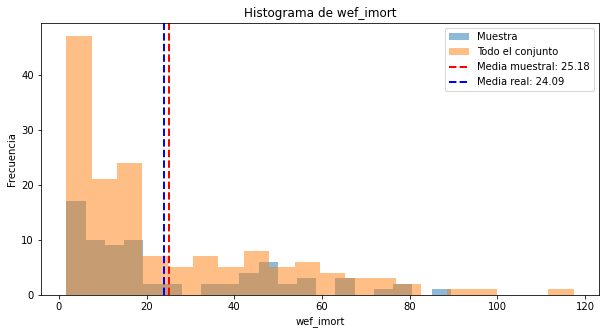

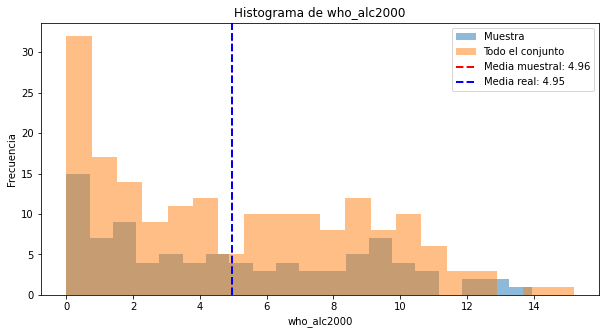

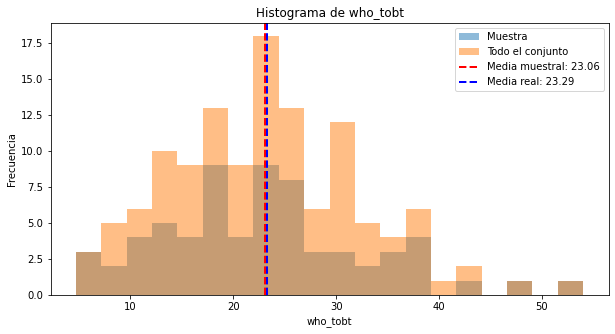

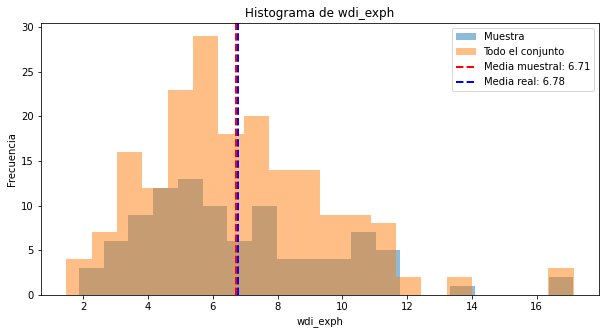

In [47]:
# Se utiliza graficar_histograma para las 4 variables asociadas con el apellido del usuario
_ = pd.Series(apellidos_n_z).apply(lambda x: graficar_histograma(df_work_sample, df_work, x, True, True))

##### Comentarios
Se observa que para las variables `wef_imort` y `who_alc2000`, la media de la muestra es mayor a la de los datos completos por un leve margen. Tambien cabe destacar que debido a una mayor varianza, la variable `wef_imort` se ve más afectada cuando se efectúa una muestra sobre el total de datos y el estimador del promedio de la muestra podría tener una mayor varianza. Para probar esto, habría que checkear la diferencia entre media muestral y media real varias veces, sin fijar una semilla en la selección de datos.

La variable `wef_imort` hace relación a _"Infant mortality, deaths/1000 live births"_, pero con la información que se cuenta no es posible sacar mayores conclusiones en comparación a otras variables. Según su distribución, si es posible notar que, al igual que `who_alc2000`, presenta un sesgo hacia numeros bajos, probablemente de países que tienen problemas en el sistema de salud y por ende tienen una mayor tasa de mortalidad infantil.

Otro punto notable es que la variable `wdi_exph` que hace relación a _"Government expenditure on health, total (% of GDP)"_ no presenta el sesgo presentado en `wef_imort` y `who_alc2000`, por lo que se podría concluir que algunos problemas sanitarios como una *mayor tasa de mortalidad infantil* no necesariamente estarían relacionados a una baja inversión, obviamente hablando en terminos relativos a GDP, pero habría que realizar una investigación en mayor profundidad.

---
**5) Genere una función que devuelva un dotplot con las medias por región para una variable entregada (2 puntos)**  
- Cada "punto" del dotplot debe representar la media, o mediana, de una variable para una región específica.
- La función debe contener los siguientes parámetros:
    * `dataframe`: La tabla de datos donde buscar las variables.
    * `plot_var`: Corresponde a una columna del dataframe entregado, de la cual se desea obtener la métrica (puede ser media o mediana).
    * `plot_by`: Corresponde a otra columna del dataframe entregado. Es la columna por la cual se quiere agrupar el `dataframe`, para acceder luego a la columna entregada en `plot_var`.
    * `statistic`: Debe presentar dos opciones; "mean" para la media y "median" para la mediana. Por defecto debe ser "mean".
    * `global_stat`: Booleano. Si es True, debe graficar la media (o mediana, según lo indicado en statistic) de la variable plot_var entregada, sin agrupar (para todos los datos entregados en dataframe). Por defecto debe ser False.
- Implemente la función en las 3 variables con una menor cantidad de datos
perdidos.



In [48]:
def graficar_dotplot(dataframe, plot_var, plot_by, statistic='mean', global_stat=False):
    plt.figure(figsize=(10,5))
    plt.title(f"Dotplot de {plot_var} v/s {plot_by}")
    plt.xlabel(f"{plot_by}")
    plt.ylabel(f"{plot_var}")
    if statistic == 'mean':
        y_data = dataframe.groupby(plot_by)[plot_var].mean()
    elif statistic == 'median':
        y_data = dataframe.groupby(plot_by)[plot_var].median()
    else:
        raise ValueError("statistic must be 'mean' or 'median'")
    x_data = dataframe[plot_by].unique()
    if global_stat:
        if statistic == 'mean':
            plt.axhline(dataframe[plot_var].mean(), color='r', linestyle='dashed', linewidth=2, label=f"Media: {round(dataframe[plot_var].mean(),2)}")
        elif statistic == 'median':
            plt.axhline(dataframe[plot_var].median(),color='r', linestyle='dashed', linewidth=2, label=f"Mediana: {round(dataframe[plot_var].median(),2)}")
        else:
            raise ValueError("statistic must be 'mean' or 'median'")
        plt.legend()
    plt.plot(x_data,y_data,'o')
    plt.xticks(rotation=45)
    plt.show()

In [49]:
variables_numericas_con_menos_datos_nulos = pd.Series(df_work_sample.select_dtypes(np.number).count().sort_values(ascending=False)[:3].index)
# El método count sirve para contar solo los valores no nulos, si no se especifíca lo contrario. De aquí podemos ver que las 3 variables con menos datos no nulos son:
print(variables_numericas_con_menos_datos_nulos)

0    gle_cgdpc
1     wdi_exph
2     undp_hdi
dtype: object


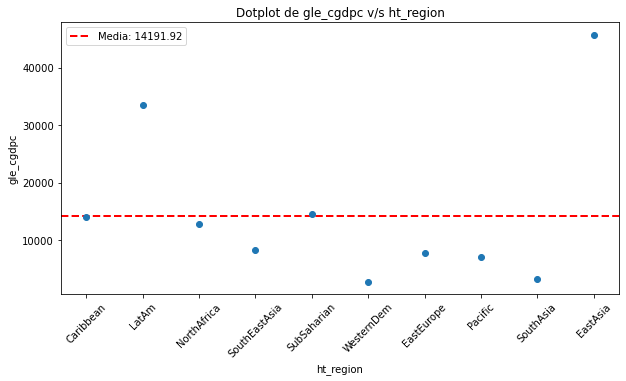

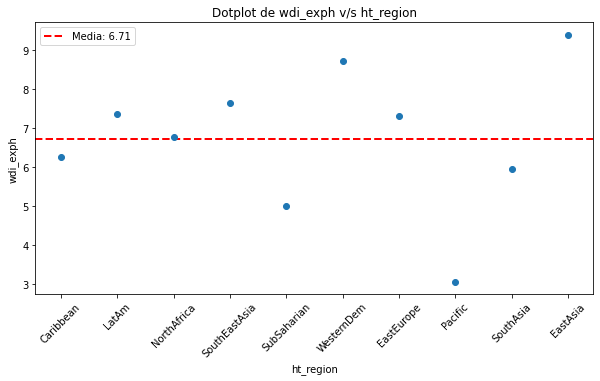

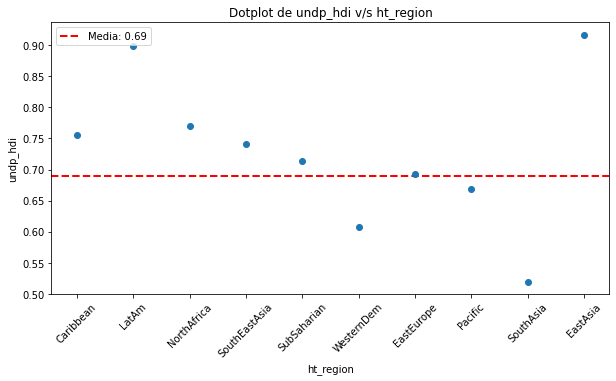

In [50]:
_ = pd.Series(variables_numericas_con_menos_datos_nulos).apply(lambda x: graficar_dotplot(df_work_sample, x, "ht_region", statistic='mean', global_stat=True))

---
**6) Guarde la base de datos (1 punto)**  
* La submuestra creada tiene un método llamado `to_csv`. Acceda a este y guarde la base de datos con la siguiente nomenclatura: >subsample_<iniciales>_demo.csv. (Subela a la plataforma, junto al desafío)

In [51]:
iniciales = 'tpm' # Cambiar según usuario
df_work_sample.to_csv(f'subsample_{iniciales}_demo.csv')